In [1]:
using Plots, LaTeXStrings
using Plots.PlotMeasures
empty!(ARGS)
push!(ARGS, "G:/Hamburg/b20.0_mu0.4/lDGAConfig.toml")
include(joinpath(@__DIR__,"../examples/example00_lDGA.jl"))

using LaTeXStrings

  Activating project at `G:\Codes\LadderDGA.jl`
[ Info: Precompiling LadderDGA [78e40beb-bf89-4c0e-9d2b-bee278912f2b] (cache misses: include_dependency fsize change (2))


[ Info: Reading Inputs...
┌ Warning: [Debug] full_chi_omega setting not found. Assuming false
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\IO.jl:43
[ Info: Setting up calculation for kGrid 2Dsc-0.25-0.05-0.025 of size 10
┌ Warning: The find_usable_range function should not be used carefully the DMFT phase transition. PLEASE FIX THIS!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFFit.jl:45
┌ Warning: The find_usable_range function should not be used carefully the DMFT phase transition. PLEASE FIX THIS!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFFit.jl:45


DBG: NOT using diagonal terms in λ₀


┌ Warning: The find_usable_range function should not be used carefully the DMFT phase transition. PLEASE FIX THIS!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFFit.jl:45
┌ Warning: The find_usable_range function should not be used carefully the DMFT phase transition. PLEASE FIX THIS!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFFit.jl:45
┌ Info: Inputs Read. Starting Computation.
│ Local susceptibilities with ranges are:
│ χLoc_m(1:301) = 0.3838, χLoc_d(1:301) = 0.1017
│ sum χupup check (plain ?≈? tail sub ?≈? imp_dens ?≈? n/2 (1-n/2)): 0.2401531297823682 ?=? 0.2427835212727256 ?≈? 0.2427835212727254 ≟ 0.24275850716113093"
└ Local EoM check for the first 5 frequencies: 0.0033 [0.2697%], 0.0033 [0.2631%], 0.0033 [0.2557%], 0.0033 [0.2464%], 0.0033 [0.2385%]  
[ Info: m channel: |∑χ(q=0,ω≠0)| = 0.005219445084 ≟ 0
┌ Warning: The find_usable_range function should not be used carefully the DMFT phase transition. PLEASE FIX THIS!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFFit.jl:45
[ Info: d channe

DBG: NOT using diagonal terms in λ₀


In [2]:
mP = lDGAhelper.mP
kG = lDGAhelper.kG
U = mP.U
nden = mP.n
beta = mP.β
lim_se = U^2 * (nden/2) * (1 - nden/2)
se_tmp = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper);

xr = collect(axes(se_tmp,2))
iν_arr = LadderDGA.iν_array(beta, xr)
gimp = lDGAhelper.gImp[1,xr];

In [3]:
ω2 = [-((2*n)*π/lDGAhelper.mP.β)^2 for n in -lDGAhelper.sP.n_iω:lDGAhelper.sP.n_iω];
ttt = kintegrate(lDGAhelper.kG, χm, 1)[1,:];
ttt2 = kintegrate(lDGAhelper.kG, χd, 1)[1,:];

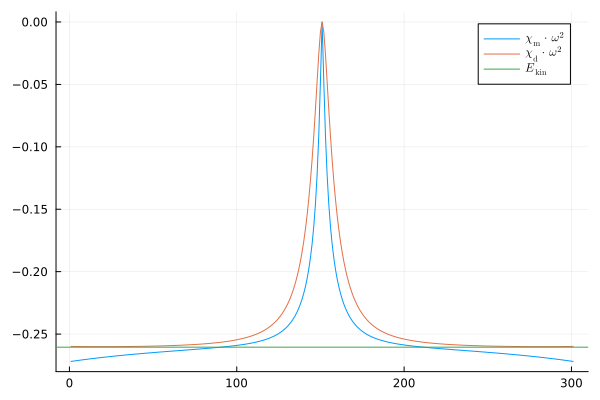

In [4]:
plot(ttt .* ω2, label=L"\chi_\mathrm{m} \cdot \omega^2")
plot!(ttt2 .* ω2, label=L"\chi_\mathrm{d} \cdot \omega^2")
hline!([lDGAhelper.mP.Ekin_1Pt], label=L"E_\mathrm{kin}")

In [5]:
Nk = LadderDGA.Nk
function calc_λud_ward(bubble::χ₀T, χm::χT, χd::χT, γm::γT, γd::γT, h::lDΓAHelper, env; λm = 0.0, λd = 0.0, GF = h.gLoc, max_Nk::Int = h.kG.Ns, χm_star_gen = nothing, χd_star_gen = nothing)

    lDGAhelper_Ur = deepcopy(lDGAhelper)
    lDGAhelper_Ur.Γ_m[:, :, :] = lDGAhelper_Ur.Γ_m[:, :, :] .- (-lDGAhelper_Ur.mP.U / lDGAhelper_Ur.mP.β^2)
    lDGAhelper_Ur.Γ_d[:, :, :] = lDGAhelper_Ur.Γ_d[:, :, :] .- (lDGAhelper_Ur.mP.U / lDGAhelper_Ur.mP.β^2)
    χm_star_gen = calc_gen_χ(lDGAhelper_Ur.Γ_m, bubble, lDGAhelper_Ur.kG)
    χd_star_gen = calc_gen_χ(lDGAhelper_Ur.Γ_d, bubble, lDGAhelper_Ur.kG);
    
    if isnothing(χm_star_gen) || isnothing(χd_star_gen)
        lDGAhelper_Ur = deepcopy(h)
        lDGAhelper_Ur.Γ_m[:, :, :] = lDGAhelper_Ur.Γ_m[:, :, :] .- (-lDGAhelper_Ur.mP.U / lDGAhelper_Ur.mP.β^2)
        lDGAhelper_Ur.Γ_d[:, :, :] = lDGAhelper_Ur.Γ_d[:, :, :] .- (lDGAhelper_Ur.mP.U / lDGAhelper_Ur.mP.β^2)
        χm_star_gen = calc_gen_χ(lDGAhelper_Ur.Γ_m, bubble, lDGAhelper_Ur.kG)
        χd_star_gen = calc_gen_χ(lDGAhelper_Ur.Γ_d, bubble, lDGAhelper_Ur.kG)
    end
    χ_λ!(χm, λm)
    Fm = F_from_χ_star_gen(bubble, χm_star_gen, χm, γm, -h.mP.U)
    reset!(χm)
    χ_λ!(χd, λd)
    Fd = F_from_χ_star_gen(bubble, χd_star_gen, χd, γd, h.mP.U)
    reset!(χd)
    println(size(Fm))
    ν_m1 = trunc(Int, size(Fm,1)/2)
    ω_1 = trunc(Int, size(Fm,4)/2)+2
    q0 = 1
    println("ν_m1 = $ν_m1 / ω_1 = $ω_1")
    res = 0.0
    for kp in 1:size(GF,1)
        res += sum(0.5 .* (Fd[ν_m1,:,q0,ω_1] - Fm[ν_m1,:,q0,ω_1] ) .* GF[kp,-h.sP.n_iν:(h.sP.n_iν-1)] .* GF[kp,(-h.sP.n_iν+1):(h.sP.n_iν)])/h.mP.β
    end
    res = res*(π/h.mP.β)/(Nk(h.kG))
end

calc_λud_ward (generic function with 1 method)

In [6]:
F_m = F_from_χ(lDGAhelper.χDMFT_m, lDGAhelper.gImp[1, :], lDGAhelper.sP, lDGAhelper.mP.β)
F_d = F_from_χ(lDGAhelper.χDMFT_d, lDGAhelper.gImp[1, :], lDGAhelper.sP, lDGAhelper.mP.β)
xr1 = -lDGAhelper.sP.n_iν:(lDGAhelper.sP.n_iν-1)
xr2 = (-lDGAhelper.sP.n_iν+1):(lDGAhelper.sP.n_iν)
    ν_m1 = trunc(Int, size(F_m,1)/2)
    ω_1 = trunc(Int, size(F_m,3)/2)+2
    res = 0.0
    for kp in 1:size(lDGAhelper.gImp,1)
        res += sum( 0.5 .* (F_d[:,ν_m1,ω_1]  .- F_m[:,ν_m1,ω_1] ) .* lDGAhelper.gImp[1, xr1] .* lDGAhelper.gImp[1, xr2] )/lDGAhelper.mP.β
    end

    for kp in 1:size(lDGAhelper.gImp,1)
        res += sum( 0.5 .* (F_d[:,ν_m1,ω_1]  .+ F_m[:,ν_m1,ω_1] ) .* lDGAhelper.gImp[1, xr1] .* lDGAhelper.gImp[1, xr2] )/lDGAhelper.mP.β
    end

In [7]:
KGrid = LadderDGA.KGrid
expandKArr = LadderDGA.expandKArr
grid_dimension = LadderDGA.grid_dimension
gridPoints = LadderDGA.gridPoints
gen_ϵkGrid = LadderDGA.Dispersions.gen_ϵkGrid
grid_type = LadderDGA.grid_type
gridshape = LadderDGA.gridshape
reduceKArr = LadderDGA.reduceKArr
function ϵ_k_plus_q(kG::KGrid, q::NTuple)
    if grid_dimension(kG) != length(q)
        throw(ArgumentError("Grid dimension differs from shift dimension!"))
    else
        k_plus_q = map(ki -> ki .+ q, expandKArr(kG, gridPoints(kG))[:])
        return gen_ϵkGrid(grid_type(kG), k_plus_q, kG.t, kG.tp, kG.tpp)
    end
end

function ϵ_k_minus_q(kG::KGrid, q::NTuple)
    if grid_dimension(kG) != length(q)
        throw(ArgumentError("Grid dimension differs from shift dimension!"))
    else
        k_minus_q = map(ki -> ki .- q, expandKArr(kG, gridPoints(kG))[:])
        return gen_ϵkGrid(grid_type(kG), k_minus_q, kG.t, kG.tp, kG.tpp)
    end
end

ϵ_k_minus_q (generic function with 1 method)

In [8]:
ina = LadderDGA.iν_array(lDGAhelper.mP.β, collect(axes(lDGAhelper.gLoc,2)))

    e_kg = expandKArr(lDGAhelper.kG, lDGAhelper.kG.ϵkGrid)
res = 0.0
res_q_l = []
res_ekq_l = []
for qi in axes(lDGAhelper.gLoc,1)
    
    #push!(res_q,sum(lDGAhelper.gLoc[qi,:].parent)/lDGAhelper.mP.β )
    qv = lDGAhelper.kG.kGrid[qi]
    e_kg_pq = reshape(ϵ_k_plus_q(lDGAhelper.kG, qv),gridshape(lDGAhelper.kG));
    e_kg_mq = reshape(ϵ_k_plus_q(lDGAhelper.kG, qv),gridshape(lDGAhelper.kG));
    rr = -(2 .* e_kg .- e_kg_pq .- e_kg_mq)
    rr_red = reduceKArr(lDGAhelper.kG, rr)
    res_ekq = kintegrate(lDGAhelper.kG, rr_red)

    push!(res_q_l,2*real(sum(lDGAhelper.gLoc[qi,:].parent .- 1 ./ ina)/(lDGAhelper.mP.β) .+ 0.5)*(lDGAhelper.kG.kMult[qi]/Nk(kG)))
    push!(res_ekq_l, res_ekq)
    res += res_q_l[end]
end
res

0.8328259441624902

In [9]:
nm = 2*lDGAhelper.sP.n_iν
vr = -lDGAhelper.sP.n_iν:(lDGAhelper.sP.n_iν-1) 
vr_p1 = (-lDGAhelper.sP.n_iν+1):(lDGAhelper.sP.n_iν) 
sum((res_dm.G_ladder[1,vr_p1] - res_dm.G_ladder[1,vr] ) .* lDGAhelper.Γ_m[1:(end-1),151,152])/lDGAhelper.mP.β

LoadError: UndefVarError: `res_dm` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [10]:
wi = 1
vr = -lDGAhelper.sP.n_iν:(lDGAhelper.sP.n_iν-1) 
vr_p1 = (-lDGAhelper.sP.n_iν+wi):(lDGAhelper.sP.n_iν-1+wi) 
sum((lDGAhelper.gLoc[1,vr_p1] - lDGAhelper.gLoc[1,vr] ) .* lDGAhelper.Γ_m[:,151,151+wi])/lDGAhelper.mP.β

7.733206955971542e-5 - 9.928835887224891e-5im

In [11]:
lDGAhelper.Σ_loc[1] .- lDGAhelper.Σ_loc[0]

-0.044655691810350895 - 0.12434478172684865im

In [12]:
res_dm =  LadderDGA.LambdaCorrection.λdm_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_EoM)

╭──── λ-correction (type: LadderDGA.LambdaCorrection.dmCorrection),... ────────╮
│  λm = 0.03473254, λd = -1.19910172, μ = 0.31348461                           │
│  n      =  0.82980608,  n DMFT  =  0.82980608,  Δ = 0.0000%                  │
│  PP_1   =  0.24275851,  PP_2    =  0.24275851,  Δ = 0.0000%                  │
│  Epot_1 =  0.08305480,  Epot_2  =  0.08305480,  Δ = 0.0000%                  │
│  Ekin_1 =  -0.27820029,  Ekin_2  = -0.26047556,  Δ = 3.2904%                 │
│  χ_m    =  0.37337564,  χ_m_loc = 0.38383441,  Δ = 1.3812%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [13]:
res_m =  LadderDGA.LambdaCorrection.λm_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_EoM)

╭──── λ-correction (type: LadderDGA.LambdaCorrection.mCorrection),... ─────────╮
│  λm = 0.02371567, λd = 0.00000000, μ = 0.29877351                            │
│  n      =  0.82980608,  n DMFT  =  0.82980608,  Δ = 0.0000%                  │
│  PP_1   =  0.24275851,  PP_2    =  0.24275851,  Δ = 0.0000%                  │
│  Epot_1 =  0.07762499,  Epot_2  =  0.05669002,  Δ = 15.5865%                 │
│  Ekin_1 =  -0.27297436,  Ekin_2  = -0.26047556,  Δ = 2.3430%                 │
│  χ_m    =  0.38655803,  χ_m_loc = 0.38383441,  Δ = 0.3535%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [14]:
res_m =  LadderDGA.LambdaCorrection.λm_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_Full, PP_mode=true)

╭──── λ-correction (type: LadderDGA.LambdaCorrection.mCorrection),... ─────────╮
│  λm = 0.02371567, λd = 0.00000000, μ = 0.21216731                            │
│  n      =  0.82980608,  n DMFT  =  0.82980608,  Δ = 0.0000%                  │
│  PP_1   =  0.24275851,  PP_2    =  0.24275851,  Δ = 0.0000%                  │
│  Epot_1 =  0.07330256,  Epot_2  =  0.05669002,  Δ = 12.7796%                 │
│  Ekin_1 =  -0.28722210,  Ekin_2  = -0.26047556,  Δ = 4.8835%                 │
│  χ_m    =  0.38655803,  χ_m_loc = 0.38383441,  Δ = 0.3535%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [15]:
res_m2 =  LadderDGA.LambdaCorrection.λm_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_Full, PP_mode=false)

╭──── λ-correction (type: LadderDGA.LambdaCorrection.mCorrection),... ─────────╮
│  λm = 2.36446407, λd = 0.00000000, μ = 0.45971744                            │
│  n      =  0.82980608,  n DMFT  =  0.82980608,  Δ = 0.0000%                  │
│  PP_1   =  0.24275851,  PP_2    =  0.11390583,  Δ = 36.1272%                 │
│  Epot_1 =  -0.00345965,  Epot_2  =  0.31439537,  Δ = 102.2253%               │
│  Ekin_1 =  -0.14123233,  Ekin_2  = -0.26047556,  Δ = 29.6841%                │
│  χ_m    =  0.12885267,  χ_m_loc = 0.38383441,  Δ = 49.7344%                  │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [16]:
res_m_NoPP =  LadderDGA.LambdaCorrection.λm_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_λm, PP_mode=true)

╭──── λ-correction (type: LadderDGA.LambdaCorrection.mCorrection),... ─────────╮
│  λm = 0.02371567, λd = 0.00000000, μ = 0.22641398                            │
│  n      =  0.82980608,  n DMFT  =  0.82980608,  Δ = 0.0000%                  │
│  PP_1   =  0.24275851,  PP_2    =  0.24275851,  Δ = 0.0000%                  │
│  Epot_1 =  0.06148414,  Epot_2  =  0.05669002,  Δ = 4.0568%                  │
│  Ekin_1 =  -0.27351208,  Ekin_2  = -0.26047556,  Δ = 2.4414%                 │
│  χ_m    =  0.38655803,  χ_m_loc = 0.38383441,  Δ = 0.3535%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [17]:
res_m_NoPP2 =  LadderDGA.LambdaCorrection.λm_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_λm, PP_mode=false)

╭──── λ-correction (type: LadderDGA.LambdaCorrection.mCorrection),... ─────────╮
│  λm = 2.36446407, λd = 0.00000000, μ = 0.62745206                            │
│  n      =  0.82980608,  n DMFT  =  0.82980608,  Δ = 0.0000%                  │
│  PP_1   =  0.24275851,  PP_2    =  0.11390583,  Δ = 36.1272%                 │
│  Epot_1 =  0.41379016,  Epot_2  =  0.31439537,  Δ = 13.6497%                 │
│  Ekin_1 =  -0.51067892,  Ekin_2  = -0.26047556,  Δ = 32.4453%                │
│  χ_m    =  0.12885267,  χ_m_loc = 0.38383441,  Δ = 49.7344%                  │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [18]:
μ_new_Full1, G_ladder_Full1, Σm_Full1 = calc_G_Σ(χm, γm, χd, γd, λ₀, res_m.λm, 0.0, lDGAhelper; tc=ΣTail_Full, fix_n = true)
μ_new_Full2, G_ladder_Full2, Σm_Full2 = calc_G_Σ(χm, γm, χd, γd, λ₀, res_m2.λm, 0.0, lDGAhelper; tc=ΣTail_Full, fix_n = true)

μ_new_λT1, G_ladder_λT1, Σm_λT1 = calc_G_Σ(χm, γm, χd, γd, λ₀, res_m_NoPP.λm, 0.0, lDGAhelper; tc=ΣTail_Plain, fix_n = true)
μ_new_λT2, G_ladder_λT2, Σm_λT2 = calc_G_Σ(χm, γm, χd, γd, λ₀, res_m_NoPP2.λm, 0.0, lDGAhelper; tc=ΣTail_Plain, fix_n = true);

In [19]:
xms = sum_kω(lDGAhelper.kG, χm, λ=res_m_NoPP.λm)
xds = sum_kω(lDGAhelper.kG, χd, λ=0.0)

0.09895898434970114

In [20]:
3*xms + xds

1.2586330742007965

In [21]:
lim_se / 2

0.48551701432226185

In [22]:
rhs, PP_p1 = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, lDGAhelper; λ_rhs = :native, PP_mode=true, verbose=true)

[ Info: λsp correction infos:
[ Info:   ↳ using n * (1 - n/2) - Σ χd as rhs
┌ Info:   ↳ Found usable intervals for non-local susceptibility of length 
│   ↳ sp: 1:301, length: 301
│   ↳ ch: 1:301, length: 301
└ ↳ χd sum = 0.09895898434970114, rhs = 0.3865580299725607


(0.3865580299725607, 0.24275850716113093)

In [23]:
lim_se_test = 2 * (nden/2) * (1 - nden/2) - xds

0.3865580299725607

In [24]:
lim_se/2

0.48551701432226185

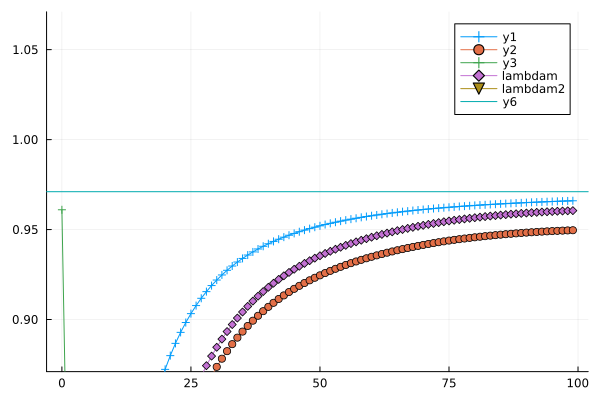

In [27]:
xr = collect(axes(Σm_Full1,2))
λ0_sum = -sum(kintegrate(lDGAhelper.kG,λ₀, 1),dims=3)[1,151:250,1] ./ (lDGAhelper.mP.β * lDGAhelper.mP.U * 0.5)
iν_arr = LadderDGA.iν_array(lDGAhelper.mP.β, xr)
lim_se = lDGAhelper.mP.U^2 * (lDGAhelper.mP.n/2) * (1 - lDGAhelper.mP.n/2)
ylims = (lim_se-0.1, lim_se+0.1)

plot(xr, real(lDGAhelper.Σ_loc[0:99,1] .* iν_arr), markershape=:auto, ylims=ylims)
plot!(xr, real((Σm_Full1[1,0:99,1]) .* iν_arr), markershape=:auto)
plot!(xr, real((Σm_Full2[1,0:99,1]) .* iν_arr), markershape=:auto)
plot!(xr, real((Σm_λT1[1,0:99,1]) .* iν_arr), markershape=:auto, label="lambdam")
plot!(xr, real((Σm_λT2[1,0:99,1]) .* iν_arr), markershape=:auto, label="lambdam2")
#plot!(xr, real(λ0_sum .* iν_arr), markershape=:auto, label="l0")
hline!([lim_se, - lim_se, 3lim_se])

In [26]:
rhs, PP_p1 = λm_rhs(χm, χd, h; λ_rhs = :native, PP_mode=(tc != ΣTail_λm), verbose=verbose)
res_m2 =  LadderDGA.LambdaCorrection.λm_correction_val2()

LoadError: UndefVarError: `tc` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [27]:
res_dm.Σ_ladder[2,:] .- res_dm.Σ_ladder[1,:] = lDGAhelper.

LoadError: ParseError:
[90m# Error @ [0;0m]8;;file://G:/Codes/LadderDGA.jl/notebooks/In[27]#1:59\[90mIn[27]:1:59[0;0m]8;;\
res_dm.Σ_ladder[2,:] .- res_dm.Σ_ladder[1,:] = lDGAhelper.[48;2;120;70;70m[0;0m
[90m#                                                         └ ── [0;0m[91mpremature end of input[0;0m

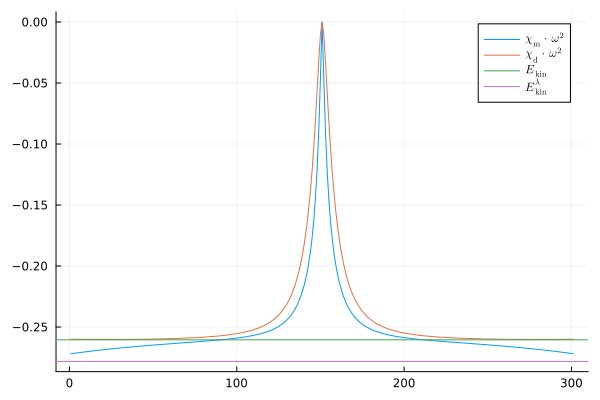

In [28]:
χm_λ = χ_λ(χm, res_dm.λm)
χd_λ = χ_λ(χd, res_dm.λd);
χ_Ekin_2_m = kintegrate(lDGAhelper.kG, χm_λ, 1)[1,:];
χ_Ekin_2_d = kintegrate(lDGAhelper.kG, χd_λ, 1)[1,:];
plot(χ_Ekin_2_m .* ω2, label=L"\chi_\mathrm{m} \cdot \omega^2")
plot!(χ_Ekin_2_d .* ω2, label=L"\chi_\mathrm{d} \cdot \omega^2")
hline!([lDGAhelper.mP.Ekin_1Pt], label=L"E_\mathrm{kin}")
hline!([res_dm.EKin_p1], label=L"E^{\lambda}_\mathrm{kin}")

In [29]:
res_dm_sc =  LadderDGA.LambdaCorrection.λdm_sc_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_EoM)

╭──── λ-correction (type: LadderDGA.LambdaCorrection.dm_scCorrection... ───────╮
│  λm = 0.03240224, λd = -0.99672097, μ = 0.29118053                           │
│  n      =  0.82980608,  n DMFT  =  0.82980608,  Δ = 0.0000%                  │
│  PP_1   =  0.24275851,  PP_2    =  0.24275851,  Δ = 0.0000%                  │
│  Epot_1 =  0.07780573,  Epot_2  =  0.07780572,  Δ = 0.0000%                  │
│  Ekin_1 =  -0.27125434,  Ekin_2  = -0.26047556,  Δ = 2.0271%                 │
│  χ_m    =  0.37600018,  χ_m_loc = 0.38383441,  Δ = 1.0310%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


# EPot Condition

In [30]:
λd_min_sample = -3.0# -4.42876699766992 #LadderDGA.LambdaCorrection.get_λ_min(χd)
λd_max = 10.0
Nit = 40
xr_dm_01, fr_dm_01 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=Nit, λmin=λd_min_sample, λmax=λd_max, tc=ΣTail_Plain)
xr_dm_02, fr_dm_02 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=Nit, λmin=λd_min_sample, λmax=λd_max, tc=ΣTail_Full)
xr_dm_03, fr_dm_03 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=Nit, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.01}, λmax=λd_max);
xr_dm_04, fr_dm_04 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=Nit, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.1}, λmax=λd_max);
#xr_dm_05, fr_dm_05 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=40, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.15}, λmax=λd_max);
xr_dm_06, fr_dm_06 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=40, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.5}, λmax=λd_max);
xr_dm_07, fr_dm_07 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=Nit, λmin=λd_min_sample, tc=ΣTail_ExpStep{1.0}, λmax=λd_max);
xr_dm_08, fr_dm_08 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=Nit, λmin=λd_min_sample, λmax=λd_max, tc=ΣTail_EoM);

┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306
┌ Wa

In [31]:
se_full_list = []
EP1_full_list = []
EP2_list = []
se_eom_list = []
EP1_eom_list = []
se_plain_list = []
EP1_plain_list = []
se_delta_list = []
EP1_delta_list = []
for λd in xr_dm_01  
    rhs,PP_p1 = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, lDGAhelper, λd=λd)
    λm  = LadderDGA.LambdaCorrection.λm_correction_val(χm, rhs, lDGAhelper)
    μ_new, G_ladder, se_tmp = calc_G_Σ(χm, γm, χd, γd, λ₀, λm, λd, lDGAhelper; tc=ΣTail_Full, fix_n = true)
    Ekin_1, Epot_1 = calc_E(G_ladder, se_tmp, μ_new, lDGAhelper.kG, lDGAhelper.mP)
    Epot_2 = EPot_p2(χm, χd, λm, λd, lDGAhelper.mP.n, lDGAhelper.mP.U, lDGAhelper.kG)
    push!(se_full_list,se_tmp)
    push!(EP1_full_list,Epot_1)
    push!(EP2_list,Epot_2)
    μ_new, G_ladder, se_tmp = calc_G_Σ(χm, γm, χd, γd, λ₀, λm, λd, lDGAhelper; tc=ΣTail_Plain, fix_n = true)
    Ekin_1, Epot_1 = calc_E(G_ladder, se_tmp, μ_new, lDGAhelper.kG, lDGAhelper.mP)
    push!(se_plain_list,se_tmp)
    push!(EP1_eom_list,Epot_1)
    μ_new, G_ladder, se_tmp = calc_G_Σ(χm, γm, χd, γd, λ₀, λm, λd, lDGAhelper; tc=ΣTail_EoM, fix_n = true)
    Ekin_1, Epot_1 = calc_E(G_ladder, se_tmp, μ_new, lDGAhelper.kG, lDGAhelper.mP)
    push!(se_eom_list,se_tmp)
    push!(EP1_plain_list,Epot_1)
    μ_new, G_ladder, se_tmp = calc_G_Σ(χm, γm, χd, γd, λ₀, λm, λd, lDGAhelper; tc=ΣTail_ExpStep{0.5}, fix_n = true)
    Ekin_1, Epot_1 = calc_E(G_ladder, se_tmp, μ_new, lDGAhelper.kG, lDGAhelper.mP)
    push!(se_delta_list,se_tmp)
    push!(EP1_delta_list,Epot_1)
end

InterruptException: InterruptException:

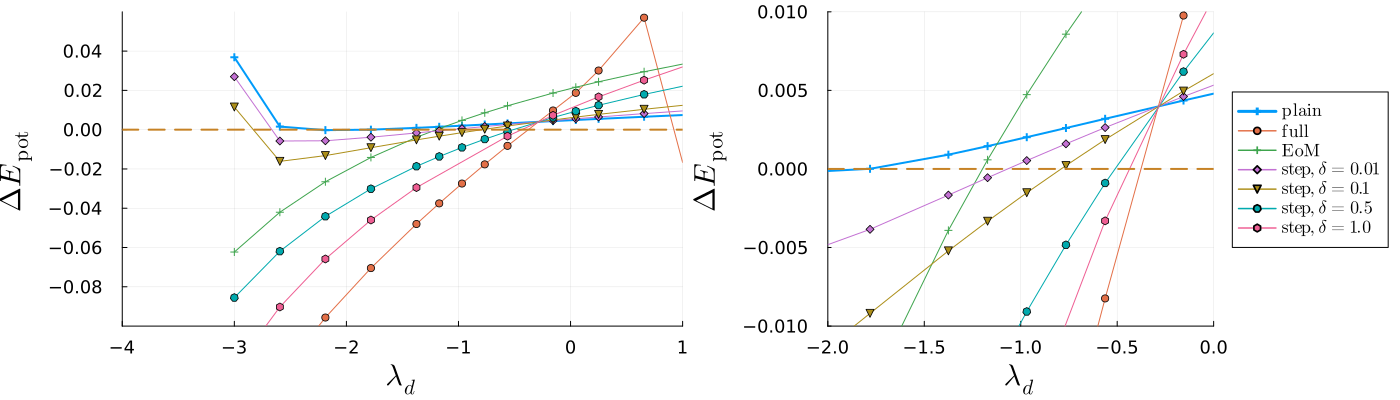

In [32]:
p1 = plot(xr_dm_01, fr_dm_01, size=(800,500), linewidth=2, ylims=(-.1,.06), xlims=(-4,1), legend=nothing, ylabel=L"\Delta E_\mathrm{pot}", xlabel=L"\lambda_d", label=L"\mathrm{plain}",
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, markershape=:auto, left_margin = 10mm, bottom_margin=10mm)
plot!(p1, xr_dm_02, fr_dm_02, label=L"\mathrm{full}", markershape=:auto)
plot!(p1, xr_dm_08, fr_dm_08, label=L"\mathrm{EoM}", markershape=:auto)
plot!(p1, xr_dm_03, fr_dm_03, label=L"\mathrm{step}, \delta=0.01", markershape=:auto)
plot!(p1, xr_dm_04, fr_dm_04, label=L"\mathrm{step}, \delta=0.1", markershape=:auto)
plot!(p1, xr_dm_06, fr_dm_06, label=L"\mathrm{step}, \delta=0.5", markershape=:auto)
plot!(p1, xr_dm_07, fr_dm_07, label=L"\mathrm{step}, \delta=1.0", markershape=:auto)
hline!([0.0], label=nothing, ls=:dash, lw=2)

p2 = plot(xr_dm_01, fr_dm_01, size=(800,500), linewidth=2, ylims=(-.01,.01), xlims=(-2,0), legend=:outerright, ylabel=L"\Delta E_\mathrm{pot}", xlabel=L"\lambda_d", label=L"\mathrm{plain}",
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, markershape=:auto, left_margin = 10mm, bottom_margin=10mm)
plot!(p2, xr_dm_02, fr_dm_02, label=L"\mathrm{full}", markershape=:auto)
plot!(p2, xr_dm_08, fr_dm_08, label=L"\mathrm{EoM}", markershape=:auto)
plot!(p2, xr_dm_03, fr_dm_03, label=L"\mathrm{step}, \delta=0.01", markershape=:auto)
plot!(p2, xr_dm_04, fr_dm_04, label=L"\mathrm{step}, \delta=0.1", markershape=:auto)
plot!(p2, xr_dm_06, fr_dm_06, label=L"\mathrm{step}, \delta=0.5", markershape=:auto)
plot!(p2, xr_dm_07, fr_dm_07, label=L"\mathrm{step}, \delta=1.0", markershape=:auto)
hline!([0.0], label=nothing, ls=:dash, lw=2)
p = plot(p1, p2, size=(1400,400), left_margin=8mm, bottom_margin=10mm)
savefig("delta_expstep_comparison_mu04.pdf")
display(p)

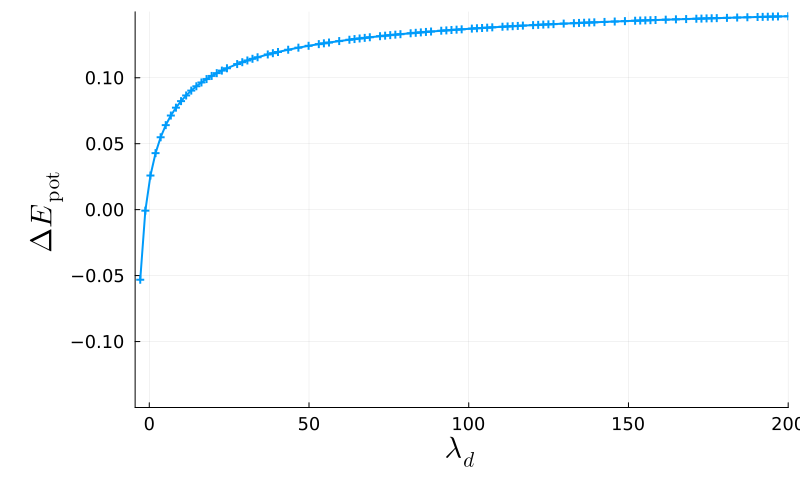

In [33]:
λd_min_sample = LadderDGA.LambdaCorrection.get_λ_min(χd)
λd_max = 200.0
Nit = 100
xr_dm_full, fr_dm_full = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=Nit, λmin=λd_min_sample, λmax=λd_max, tc=ΣTail_EoM);
plot(xr_dm_full, fr_dm_full,size=(800,500), linewidth=2, ylims=(-.15,.15), xlims=(λd_min_sample,λd_max), legend=nothing, ylabel=L"\Delta E_\mathrm{pot}", xlabel=L"\lambda_d", label=L"\mathrm{plain}",
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, markershape=:auto, left_margin = 10mm, bottom_margin=10mm)

In [34]:
include(joinpath(@__DIR__,"RootsTests.jl"))

LoadError: LoadError: ArgumentError: Package ForwardDiff not found in current path.
- Run `import Pkg; Pkg.add("ForwardDiff")` to install the ForwardDiff package.
in expression starting at G:\Codes\LadderDGA.jl\notebooks\RootsTests.jl:2

In [35]:
#@timeit to "newtonRF" λdm_correction_val_testRF(χm,γm,χd, γd,λ₀, lDGAhelper; δλd=1e-1, eps = 1e-8)

@timeit to "newtonReset" λdm_correction_val_test(χm,γm,χd, γd,λ₀, lDGAhelper;  δλd=1e-1, fix_n = true, tc= ΣTail_EoM,  use_trivial_λmin = true,  λd_min = NaN,  validation_threshold = 1e-8, max_steps_m = 2000,  max_steps_dm = 2000)

@timeit to "newtonSecular" λdm_correction_val_testTF(χm,γm,χd, γd,λ₀, lDGAhelper;  δλd=1e-1, validation_threshold = 1e-8, max_steps_m = 2000,  max_steps_dm = 2000)

methodList = [("Bisection", Roots.Bisection()), ("A42", Roots.A42()), ("AlefeldPotraShi", Roots.AlefeldPotraShi()), ("Brent", Roots.Brent()), ("Chandrapatla", Roots.Chandrapatla()),
              ("Ridders", Roots.Ridders()), ("ITP", Roots.ITP()), ("FalsePosition", Roots.FalsePosition())]#,
               # ("LithBoonkkampIJzermanBracket",Roots.LithBoonkkampIJzermanBracket()),("BracketedHalley",Roots.BracketedHalley()),("BracketedChebyshev",Roots.BracketedChebyshev()),("BracketedSchroder",Roots.BracketedSchroder())] 
for el in methodList
    try
        @timeit to el[1] λdm_correction_val_MethodTest(el[2], χm,γm,χd, γd,λ₀, lDGAhelper; δλd=1e-1 , fix_n = true, tc= ΣTail_EoM,  use_trivial_λmin = true,  λd_min = NaN,  validation_threshold = 1e-8, max_steps_m = 2000,  max_steps_dm = 2000)
    catch e
        println("method $(el[1]) failed with $e")
    end
end


LoadError: UndefVarError: `to` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [36]:
rhs,PP_p1 = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, lDGAhelper, λd=.1)
ωn2_tail = ω2_tail(χm)
@timeit to "newtonReset" t = λm_correction_val_reset(χm, rhs, lDGAhelper.kG, ωn2_tail;  δλ=1e-1,eps = 1e-8, max_steps =100)
println(t)
@timeit to "newtonSecular" t = λm_correction_val_secular(χm, rhs, lDGAhelper.kG, ωn2_tail;  δλ=1e-1,eps = 1e-8)
println(t)
methodList = [("Bisection", Roots.Bisection()), ("A42", Roots.A42()), ("AlefeldPotraShi", Roots.AlefeldPotraShi()), ("Brent", Roots.Brent()), ("Chandrapatla", Roots.Chandrapatla()),
              ("Ridders", Roots.Ridders()), ("ITP", Roots.ITP()), ("FalsePosition", Roots.FalsePosition())]#,
               # ("LithBoonkkampIJzermanBracket",Roots.LithBoonkkampIJzermanBracket()),("BracketedHalley",Roots.BracketedHalley()),("BracketedChebyshev",Roots.BracketedChebyshev()),("BracketedSchroder",Roots.BracketedSchroder())] 
for el in methodList
    try
        @timeit to el[1] t = λm_correction_val_MethodTest(el[2],χm, rhs, lDGAhelper.kG, ωn2_tail;  δλ=1e-1,eps = 1e-8)
        println(t)
    catch e
        println("method $(el[1]) failed with $e")
    end
end


LoadError: UndefVarError: `ω2_tail` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [37]:
to

LoadError: UndefVarError: `to` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [38]:
A42                    151ms     12
newtonReset            103ms     24
Bisection              101ms     32
AlefeldPotraShi        36.5ms    11
ITP                    34.2ms    19
Ridders                32.0ms    14
Brent                  31.3ms     9 
FalsePosition          27.2ms     7
Chandrapatla           25.0ms    12
newtonSecular          24.0ms    10

LoadError: UndefVarError: `A42` not defined in `Main`
Suggestion: check for spelling errors or missing imports.
Hint: a global variable of this name may be made accessible by importing Roots in the current active module Main

In [39]:
λd_i = -4.428666997669956
λdmin=get_λ_min(χd)
λmmin=get_λ_min(χm)

χ_λ!(χd,λd_i)
λdmin2=get_λ_min(χd)
reset!(χd)
println("λmmin = $λmmin, λdmin = $λdmin, λdmin2 = $λdmin2")

LoadError: UndefVarError: `get_λ_min` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [40]:
λd_i = -4.35 #428666997669956
xr_m_01, fr_m_01 = LadderDGA.LambdaCorrection.PPCond_curve(χm,γm,χd, γd,λ₀, lDGAhelper; feps_abs=1e-12, xeps_abs=1e-12, maxit=3000, 
                    λmin=λmmin, λmax=10.5, verbose = false)

xr_m_02, fr_m_02 = LadderDGA.LambdaCorrection.PPCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; λd=λd_i, feps_abs=1e-12, xeps_abs=1e-12, maxit=3000, 
                    λmin=λmmin, λmax=10.5, verbose = false)

rhs_c1,_ = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, lDGAhelper; λd=λd_i)
ωn2_tail = ω2_tail(χm)
λm_i   = λm_correction_val(χm, rhs_c1, lDGAhelper.kG, ωn2_tail;)

LoadError: UndefVarError: `λmmin` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [41]:
λd_min_sample = λdmin
λd_max = 0.0
Nit = 200
xr_dm_01, fr_dm_01 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=Nit, λmin=λd_min_sample, λmax=λd_max, tc=ΣTail_EoM);

LoadError: UndefVarError: `λdmin` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [42]:
p1 = plot(xr_dm_01, fr_dm_01, xlabel=L"\lambda_\mathrm{d}", label=L"E^{(1)}_\mathrm{pot}- E^{(2)}_\mathrm{pot}", 
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12,left_margin = 10mm, bottom_margin=10mm)
vline!([λdmin], lw=2, ls=:dash, label=L"\lambda_{\mathrm{d},\mathrm{min}}")
vline!([λdmin_new], lw=2, ls=:dash, label=L"\lambda_{\mathrm{d},\mathrm{min2}}")
savefig("lambda_min_cmp.pdf")
display(p1)

LoadError: UndefVarError: `λdmin` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [43]:
to

LoadError: UndefVarError: `to` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [44]:
reset_timer!(to)

LoadError: UndefVarError: `to` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [45]:
using OffsetArrays, TimerOutputs, FiniteDiff, LinearAlgebra
using ForwardDiff
using Roots
λ₀T = LadderDGA.λ₀T
eom_ν_cutoff = LadderDGA.eom_ν_cutoff
ω2_tail= LadderDGA.ω2_tail
iν_array = LadderDGA.iν_array
tail_factor = LadderDGA.tail_factor
tail_correction_term = LadderDGA.tail_correction_term
get_λ_min = LadderDGA.LambdaCorrection.get_λ_min
newton_right = LadderDGA.LambdaCorrection.newton_right
λm_rhs = LadderDGA.LambdaCorrection.λm_rhs
λm_correction_val = LadderDGA.LambdaCorrection.λm_correction_val
calc_G_Σ! = LadderDGA.calc_G_Σ!
to = LadderDGA.to
newton_secular = LadderDGA.LambdaCorrection.newton_secular

function newton_right_test(f::Function, start::Float64, min::Float64; nsteps::Int=100, atol::Float64=1e-8, δ::Float64=1e-4, verbose::Bool=true)::Float64
    df(x) = FiniteDiff.finite_difference_derivative(f, x, typeof(Val(:forward)), Float64)
    newton_right_test(f, df, start, min; nsteps = nsteps, atol = atol, δ = δ, verbose=verbose)
end

function newton_right_test(f::Function, df::Function, start::Float64, min::Float64; nsteps::Int = 500, atol::Float64=1e-8, δ::Float64=1e-4, verbose::Bool=true)::Float64
    done  = false
    xlast = start + δ
    xi    = xlast
    i     = 1
    while !done
        fi = f(xi)
        dfii = 1 / df(xi)
        xi = xlast - dfii * fi
        # Found solution in the correct interval
        (norm(fi) < atol) && (xi > min) && break
        # only ever search to the right! bisect instead
        if xi < min
            xi = norm(xlast - (min + δ))/2 +  (min + δ)
        else
            xlast = xi
        end
        (i >= nsteps) && (done = true)
        verbose && println("i = $i, xi = $xi, f(xi) = $fi")
        i += 1
    end
    println("nsteps = ", i-1)
    return xi
end

function λdm_correction_val_testTF(χm::χT,γm::γT,χd::χT, γd::γT,λ₀::λ₀T, h; 
                        νmax::Int = eom_ν_cutoff(h), fix_n::Bool = true,tc::Type{<: ΣTail} = default_Σ_tail_correction(),
                        use_trivial_λmin::Bool = (tc === ΣTail_EoM),  λd_min::Float64 = NaN, sigdigits::Int=9,
                        validation_threshold::Float64 = 1e-8, max_steps_m::Int = 2000, 
                        max_steps_dm::Int = 2000, log_io = devnull)::Tuple{Float64,Float64}
    ωn2_tail = ω2_tail(χm)
    Nq::Int = length(h.kG.kMult)
    
    Kνωq_pre::Vector{ComplexF64} = Vector{ComplexF64}(undef, Nq)
    Σ_ladder = OffsetArray(Matrix{ComplexF64}(undef, Nq, νmax), 1:Nq, 0:νmax-1)
    G_ladder = similar(Σ_ladder)
    iν = iν_array(h.mP.β, collect(axes(Σ_ladder, 2)))
    tc_factor = tail_factor(tc, h.mP.U, h.mP.β, h.mP.n, h.Σ_loc, iν) 

    λd_min::Float64 = if !isnan(λd_min)
        λd_min
    else
        if use_trivial_λmin 
            get_λ_min(χd)
        else
            get_λd_min(χm, γm, χd, γd, λ₀, h)
        end
    end

    cache = Dict{Float64,Float64}()
    sizehint!(cache, 4*max_steps_dm)
    NF = 0
    
    function f_c2(λd_i::Float64)
        NF += 1
        λd_i = round(λd_i,sigdigits=sigdigits)
        if λd_i in keys(cache)
            return cache[λd_i]
        else
            rhs_c1,_ = λm_rhs(χm, χd, h; λd=λd_i)
            λm_i   = λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail; max_steps=max_steps_m, eps=validation_threshold)
            tc_term  = (tc === ΣTail_EoM) ? h.χ_m_loc : tail_correction_term(sum_kω(h.kG, χm, λ=λm_i), h.χloc_m_sum, tc_factor)
            μ_new = calc_G_Σ!(G_ladder, Σ_ladder, Kνωq_pre, tc_term, χm, γm, χd, γd, λ₀, λm_i, λd_i, h, fix_n=fix_n)
    
            #TODO: use Epot_1
            Ekin_1, Epot_1 = calc_E(G_ladder, Σ_ladder, μ_new, h.kG, h.mP)
            Epot_2 = EPot_p2(χm, χd, λm_i, λd_i, h.mP.n, h.mP.U, h.kG)
            cache[λd_i] = Epot_1 - Epot_2
        end
        return cache[λd_i]
    end
    λd  = newton_secular(f_c2, λd_min; nsteps=max_steps_dm, atol=validation_threshold)
    println("Method: Secular. Result = ", λd, " /// NF = $NF" )
    rhs,_ = λm_rhs(χm, χd, h; λd=λd)
    λm  = λm_correction_val(χm, rhs, h; max_steps=max_steps_m, eps=validation_threshold)
    return λm, λd
end

function λdm_correction_val_test(χm::χT,γm::γT,χd::χT, γd::γT,λ₀::λ₀T, h; 
                        νmax::Int = eom_ν_cutoff(h), fix_n::Bool = true,tc::Type{<: ΣTail} = default_Σ_tail_correction(),
                        use_trivial_λmin::Bool = (tc === ΣTail_EoM),  λd_min::Float64 = NaN, sigdigits::Int=9,
                        validation_threshold::Float64 = 1e-8, max_steps_m::Int = 2000, 
                        max_steps_dm::Int = 2000, log_io = devnull)::Tuple{Float64,Float64}
    ωn2_tail = ω2_tail(χm)
    Nq::Int = length(h.kG.kMult)
    
    Kνωq_pre::Vector{ComplexF64} = Vector{ComplexF64}(undef, Nq)
    Σ_ladder = OffsetArray(Matrix{ComplexF64}(undef, Nq, νmax), 1:Nq, 0:νmax-1)
    G_ladder = similar(Σ_ladder)
    iν = iν_array(h.mP.β, collect(axes(Σ_ladder, 2)))
    tc_factor = tail_factor(tc, h.mP.U, h.mP.β, h.mP.n, h.Σ_loc, iν) 

    λd_min::Float64 = if !isnan(λd_min)
        λd_min
    else
        if use_trivial_λmin 
            get_λ_min(χd)
        else
            get_λd_min(χm, γm, χd, γd, λ₀, h)
        end
    end
    
    cache = Dict{Float64,Float64}()
    sizehint!(cache, 4*max_steps_dm)
    NF = 0
    
    function f_c2(λd_i::Float64)
        NF += 1
        λd_i = round(λd_i,sigdigits=sigdigits)
        if λd_i in keys(cache)
            return cache[λd_i]
        else
            rhs_c1,_ = λm_rhs(χm, χd, h; λd=λd_i)
            λm_i   = λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail; max_steps=max_steps_m, eps=validation_threshold)
            tc_term  = (tc === ΣTail_EoM) ? h.χ_m_loc : tail_correction_term(sum_kω(h.kG, χm, λ=λm_i), h.χloc_m_sum, tc_factor)
            μ_new = calc_G_Σ!(G_ladder, Σ_ladder, Kνωq_pre, tc_term, χm, γm, χd, γd, λ₀, λm_i, λd_i, h, fix_n=fix_n)
    
            #TODO: use Epot_1
            Ekin_1, Epot_1 = calc_E(G_ladder, Σ_ladder, μ_new, h.kG, h.mP)
            Epot_2 = EPot_p2(χm, χd, λm_i, λd_i, h.mP.n, h.mP.U, h.kG)
            cache[λd_i] = Epot_1 - Epot_2
        end
        return cache[λd_i]
    end
    λd  = newton_right_test(f_c2, λd_min+20.0, λd_min, verbose=false, nsteps=max_steps_dm, atol=validation_threshold, δ=1e-3)
    println("Method: Reset. Result = ", λd, " /// NF = $NF" )
    rhs,_ = λm_rhs(χm, χd, h; λd=λd)
    λm  = λm_correction_val(χm, rhs, h; max_steps=max_steps_m, eps=validation_threshold)
    return λm, λd
end

function λdm_correction_val_MethodTest(method, χm::χT,γm::γT,χd::χT, γd::γT,λ₀::λ₀T, h; 
                        νmax::Int = eom_ν_cutoff(h), fix_n::Bool = true,tc::Type{<: ΣTail} = default_Σ_tail_correction(),
                        use_trivial_λmin::Bool = (tc === ΣTail_EoM),  λd_min::Float64 = NaN, sigdigits::Int=9,
                        validation_threshold::Float64 = 1e-8, max_steps_m::Int = 2000, 
                        max_steps_dm::Int = 2000, log_io = devnull)::Tuple{Float64,Float64}
    ωn2_tail = ω2_tail(χm)
    Nq::Int = length(h.kG.kMult)
    
    Kνωq_pre::Vector{ComplexF64} = Vector{ComplexF64}(undef, Nq)
    Σ_ladder = OffsetArray(Matrix{ComplexF64}(undef, Nq, νmax), 1:Nq, 0:νmax-1)
    G_ladder = similar(Σ_ladder)
    iν = iν_array(h.mP.β, collect(axes(Σ_ladder, 2)))
    tc_factor = tail_factor(tc, h.mP.U, h.mP.β, h.mP.n, h.Σ_loc, iν) 

    λd_min::Float64 = if !isnan(λd_min)
        λd_min
    else
        if use_trivial_λmin 
            get_λ_min(χd)
        else
            get_λd_min(χm, γm, χd, γd, λ₀, h)
        end
    end

    cache = Dict{Float64,Float64}()
    sizehint!(cache, 4*max_steps_dm)
    NF = 0

    function f_c2(λd_i::Float64)
        NF += 1
        λd_i = round(λd_i,sigdigits=sigdigits)
        if λd_i in keys(cache)
            return cache[λd_i]
        else
            rhs_c1,_ = λm_rhs(χm, χd, h; λd=λd_i)
            λm_i   = λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail; max_steps=max_steps_m, eps=validation_threshold)
            tc_term  = (tc === ΣTail_EoM) ? h.χ_m_loc : tail_correction_term(sum_kω(h.kG, χm, λ=λm_i), h.χloc_m_sum, tc_factor)
            μ_new = calc_G_Σ!(G_ladder, Σ_ladder, Kνωq_pre, tc_term, χm, γm, χd, γd, λ₀, λm_i, λd_i, h, fix_n=fix_n)
    
            #TODO: use Epot_1
            Ekin_1, Epot_1 = calc_E(G_ladder, Σ_ladder, μ_new, h.kG, h.mP)
            Epot_2 = EPot_p2(χm, χd, λm_i, λd_i, h.mP.n, h.mP.U, h.kG)
            cache[λd_i] = Epot_1 - Epot_2
        end
        return cache[λd_i]
    end
    println(f_c2(λd_min + 1e-4), " ::: ", f_c2(200.0))
    λd  = find_zero(f_c2, (λd_min + 1e-4,200.0), method; atol=validation_threshold, maxiters=max_steps_dm)
    println("Method: $method. Result = ", λd, " /// NF = $NF" )
    rhs,_ = λm_rhs(χm, χd, h; λd=λd)
    λm  = λm_correction_val(χm, rhs, h; max_steps=max_steps_m, eps=validation_threshold)
    return λm, λd
end


LoadError: ArgumentError: Package ForwardDiff not found in current path.
- Run `import Pkg; Pkg.add("ForwardDiff")` to install the ForwardDiff package.